In [5]:
import numpy as np 
import pandas as pd 
import geopandas as gpd

In [10]:
df = pd.read_csv('C:/Users/rasha/Downloads/KRCS desert locusts survey - vegtype.csv')
region_aoi = gpd.read_file("D:/hub_data_kenya_latest_attacks.geojson")

In [11]:
df.head()

,county,subcounty,date,vegcov,croptype,cropstag,veghealth,vegdens,soiltype,soilmois,lat,lot
0,Wajir,Wajir South,28-05-20,shrubland,NaN,NaN,Drying,medium,Sandy soil,Dry,0.952113,40.300432
1,Wajir,Wajir South,28-05-20,shrubland,NaN,NaN,Drying,medium,Sandy soil,Dry,0.917690,40.312617
2,Samburu,Samburu East,25-05-20,shrubland,NaN,NaN,Drying,medium,Loamy soil,Dry,1.116153,37.545842
3,Samburu,Samburu East,23-05-20,shrubland,NaN,NaN,Green,medium,Loamy soil,Dry,0.886393,37.066035
4,Samburu,Samburu East,26-05-20,shrubland,NaN,NaN,Greening,medium,Sandy soil,Dry,0.991620,37.572697


In [12]:
soil_type = df.soiltype.unique()
veg_dens = df.vegdens.unique()
veg_health = df.veghealth.unique()

print(veg_dens)

['medium' 'dense' 'Low']


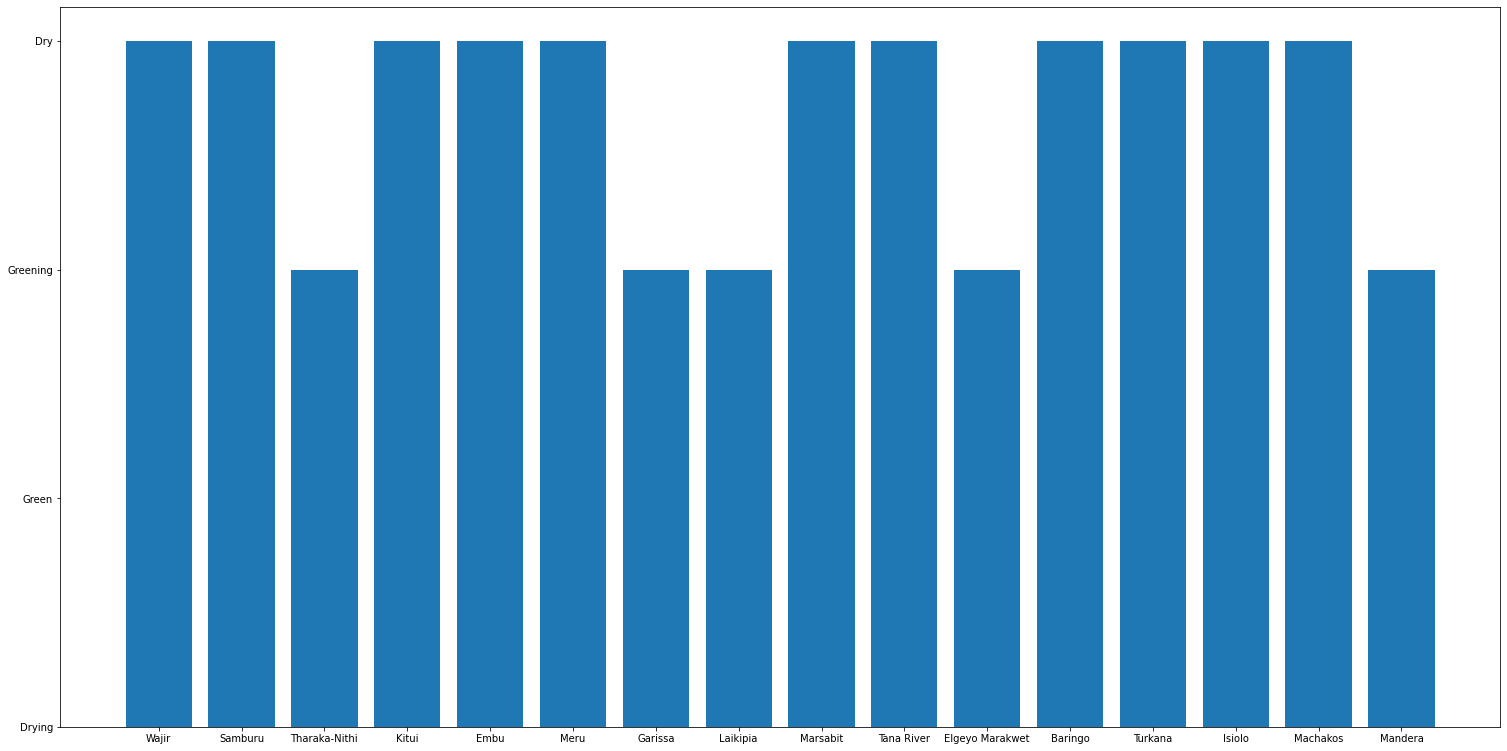

In [13]:
# Visualize our data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
county = df.county

veg_health = df.veghealth
ax.bar(county,veg_health)
plt.show()

In [14]:
# Conver csv to geojson
from shapely.geometry import Point
import geopandas as gpd
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df['lot'], df['lat'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Users\rasha\.conda\envs\omdena_malaria\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [15]:
gdf.head()

,county,subcounty,date,vegcov,croptype,cropstag,veghealth,vegdens,soiltype,soilmois,lat,lot,geometry
0,Wajir,Wajir South,28-05-20,shrubland,NaN,NaN,Drying,medium,Sandy soil,Dry,0.952113,40.300432,POINT (40.30043 0.95211)
1,Wajir,Wajir South,28-05-20,shrubland,NaN,NaN,Drying,medium,Sandy soil,Dry,0.917690,40.312617,POINT (40.31262 0.91769)
2,Samburu,Samburu East,25-05-20,shrubland,NaN,NaN,Drying,medium,Loamy soil,Dry,1.116153,37.545842,POINT (37.54584 1.11615)
3,Samburu,Samburu East,23-05-20,shrubland,NaN,NaN,Green,medium,Loamy soil,Dry,0.886393,37.066035,POINT (37.06603 0.88639)
4,Samburu,Samburu East,26-05-20,shrubland,NaN,NaN,Greening,medium,Sandy soil,Dry,0.991620,37.572697,POINT (37.57270 0.99162)


<AxesSubplot:>

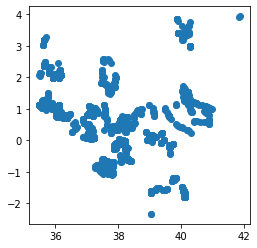

In [16]:
gdf.plot()

In [12]:
#aoi_labeled = gpd.sjoin(region_aoi, gdf, op="within")

In [25]:
gdf.to_file("D:/kenya_aoi_labeled.geojson", driver='GeoJSON')

In [ ]:
gdf.to_file("D:/kenya_aoi_labeled.geojson", driver='GeoJSON')